In [81]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")

## Exploratory Data Analysis

My goal for this EDA is to identify features that will be useful for modeling the probability that a pitch was affected by a dew-point of >65 degrees Fahrenheit. 

I also aim to examine any differences and similarities between pitches from different pitchers and pitches of different pitch types. Intuitively, I figure that two different pitchers can reasonably have very different measurements for release data, approach angle, and more; I also figure that these measurements, as well as pitch location, can vary greatly and within reason for different pitch types. 

Therefore, I hope to determine whether or not these intuitions are legitimate, and to determine to what extent different pitchers and pitch types should be evaluated differently.

The project instructions explain that increased dew point "can affect the flight of a pitch and it can also affect the pitcher's comfortability." Based on this explanation, I limit my examination to features which may be associated with pitch flight or indicative of pitcher comfortability. They are the ones included in 'columns_of_interest' below.

In [106]:
# I identify 'columns_of_interest' which are features that are associated with pitch flight / pitcher comfortability, as explained in the above Markdown
# I standardize the numeric features in working_df 

from sklearn.preprocessing import StandardScaler

df['PITCHER_KEY'] = df['PITCHER_KEY'].astype(str)

columns_of_interest = [
    'INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK', 'SPIN_RATE_ABSOLUTE',
       'RELEASE_SPEED', 'RELEASE_SIDE', 'RELEASE_HEIGHT', 'RELEASE_EXTENSION',
       'HORIZONTAL_APPROACH_ANGLE', 'VERTICAL_APPROACH_ANGLE', 'PLATE_X',
       'PLATE_Z'
]

working_df = df[['PITCHER_KEY'] + ['PITCH_TYPE_TRACKED_KEY'] + columns_of_interest]

scaler = StandardScaler()
working_df[columns_of_interest] = scaler.fit_transform(working_df[columns_of_interest])

working_df.head()

/opt/miniconda3/envs/cse217a/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/miniconda3/envs/cse217a/lib/python3.7/site-packages/pandas/core/indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,PITCHER_KEY,PITCH_TYPE_TRACKED_KEY,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
0,668881,FB,0.981421,-1.074050,0.287270,1.961109,-1.000015,0.564193,0.416044,0.372048,0.357678,0.151250,-0.436736
1,668881,FB,0.944203,-0.947744,-0.054186,1.904743,-1.054234,0.314121,0.593995,-0.060536,0.985668,-1.234270,0.552218
2,668881,SL,-0.176608,0.423134,0.054339,0.118941,-1.122399,0.148204,0.860922,1.128647,-0.191331,-0.073593,-0.174781
3,668881,SL,-0.275120,0.415895,0.123160,0.112528,-1.055234,0.176609,0.576200,1.337346,-0.252555,0.622386,-0.231312
4,668881,SL,-0.361974,0.178659,0.401088,-0.021905,-1.144311,0.615377,0.255888,0.712231,0.281913,-0.859073,1.141498


In [107]:
# I group by PITCHER_KEY to examine differences in measurements between pitchers

pitcher_avg_df = working_df.groupby('PITCHER_KEY').mean()
pitcher_avg_df.head()

,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
PITCHER_KEY,,,,,,,,,,,
518585,0.144428,-0.195026,-1.283548,-0.341606,-0.441026,0.225467,0.943176,0.349692,-0.149804,0.166425,-0.119173
570666,-0.422589,-0.470647,-0.329605,-0.362020,-0.067420,0.622696,-0.940834,-0.157065,-0.669445,0.028835,-0.411261
571656,-0.105217,-0.495166,-0.076570,-0.064710,-0.352568,-0.005124,-0.233232,0.079785,-0.011326,0.046304,0.077930
571882,-0.153896,-0.108267,-0.082012,0.209444,-0.328218,1.326213,0.408595,0.280270,-0.390141,0.134477,-0.048874
571912,1.390381,-0.356581,-1.296274,-3.659384,-0.562958,1.194239,-1.185517,0.176534,-0.780000,-0.310744,0.572699


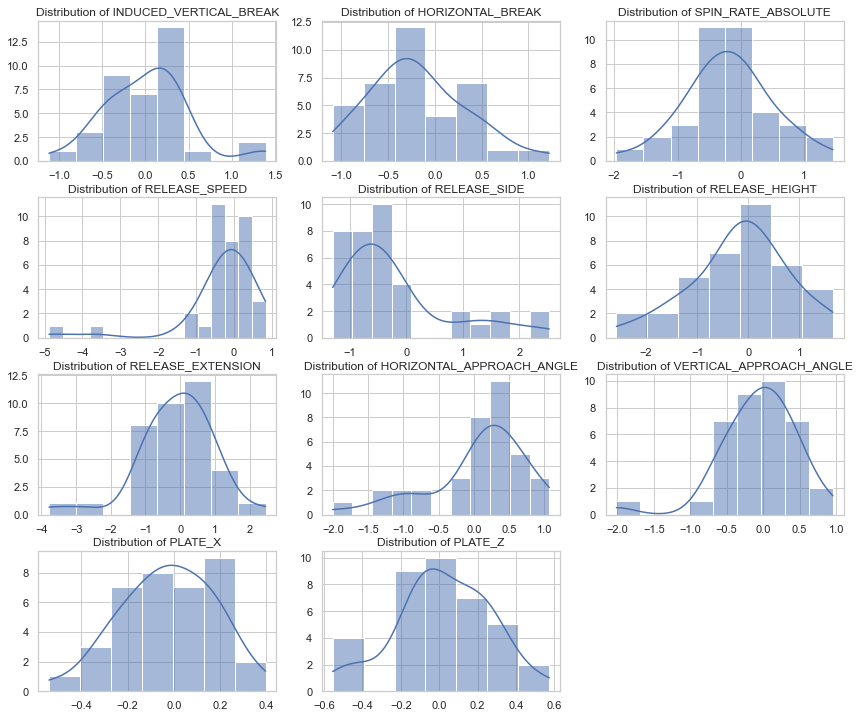

In [108]:
# I plot histograms of the distributions of each pitcher's average for the 'columns_of_interest'

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
fig.tight_layout()

for i, col in enumerate(columns_of_interest):
    r, c = divmod(i, 3)
    ax = axes[r, c]
    sns.histplot(pitcher_avg_df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

if len(columns_of_interest) < len(axes.flat):
    for i in range(len(columns_of_interest), len(axes.flat)):
        fig.delaxes(axes.flatten()[i])

plt.show()


In [109]:
# I group by PITCH_TYPE_TRACKED_KEY to examine differences in measurements between pitch types

pitch_type_avg_df = working_df.groupby('PITCH_TYPE_TRACKED_KEY').mean()
pitch_type_avg_df.head()

,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
PITCH_TYPE_TRACKED_KEY,,,,,,,,,,,
CB,-2.208596,-0.012832,0.504814,-1.739643,0.184832,0.433393,-0.046781,-0.217965,-1.707996,-0.135845,-0.416651
CF,0.012038,0.152226,0.233206,0.594969,-0.184466,0.739745,-0.537595,0.273990,0.064110,0.131284,0.169764
CH,-0.291085,-0.205766,-1.367635,-0.566655,0.312903,-0.085032,-0.101931,-0.422117,-0.526863,-0.160486,-0.549406
FB,1.057733,-0.251835,-0.043237,0.738283,0.009982,-0.087053,0.202945,-0.154232,0.931860,-0.073075,0.554923
KN,0.627631,-1.045086,-2.389697,-4.776365,-0.712667,0.346527,-1.191448,-0.601205,-1.674428,-1.821402,0.374673


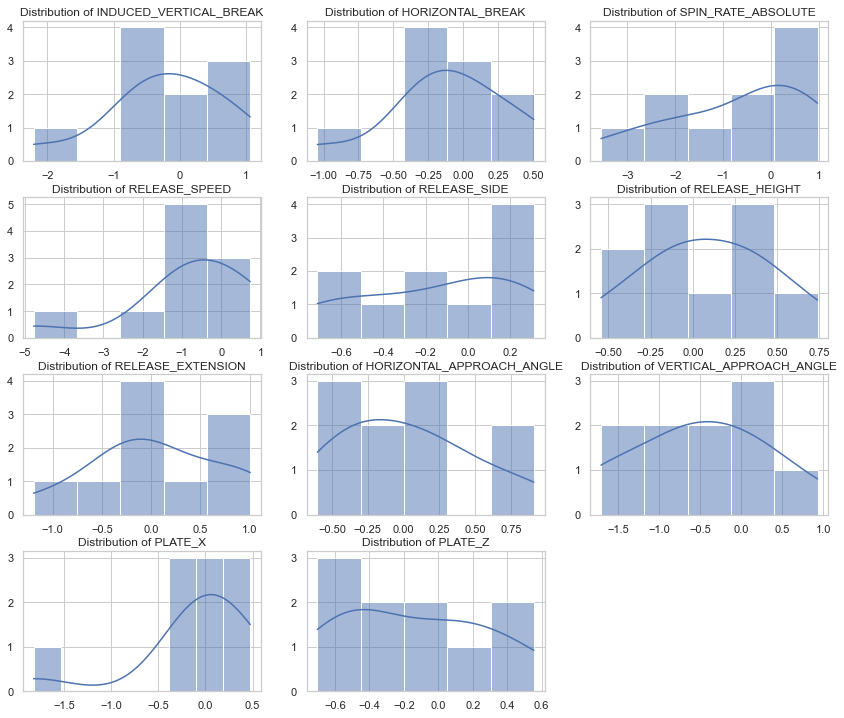

In [110]:
# I plot histograms of the distributions of each pitch type's average for the 'columns_of_interest'

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
fig.tight_layout()

for i, col in enumerate(columns_of_interest):
    r, c = divmod(i, 3)
    ax = axes[r, c]
    sns.histplot(pitch_type_avg_df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

if len(columns_of_interest) < len(axes.flat):
    for i in range(len(columns_of_interest), len(axes.flat)):
        fig.delaxes(axes.flatten()[i])

plt.show()

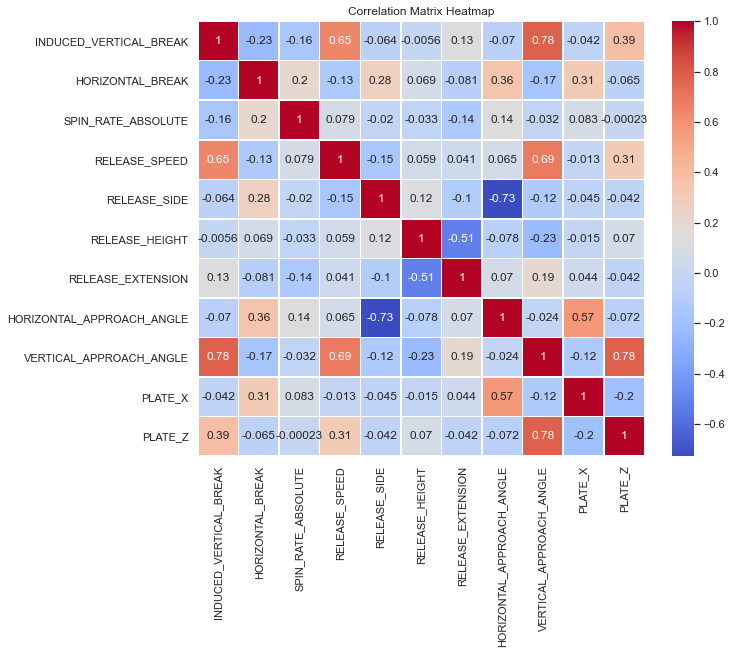

In [111]:
# I display a correlation_matrix of the 'columns_of_interest' 
# to identify features that are correlated and may be redundant

selected_df = working_df[columns_of_interest]

correlation_matrix = selected_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## EDA Conclusions

The histograms showing the distribution of statistics for different pitchers and different pitch types indicate fairly broad distributions, affirming that pitches should be evaluated with pitcher and pitch type in mind. 

From the above correlation matrix, I see that INDUCED_VERTICAL_BREAK, VERTICAL_APPROACH_ANGLE, and PLATE_Z are fairly correlated; and also that HORIZONTAL_BREAK, HORIZONTAL_APPROACH_ANGLE, and PLATE_X are fairly correlated. These correlations make sense, because they are all relevant to pitch flight and direction. 

Due to these correlations, of these fields I only selected to keep (1) INDUCED_VERTICAL_BREAK and (2) HORIZONTAL_BREAK, figuring there should be one variable to reflect vertical movement and one to reflect horizontal movement.

I also selected to keep (3) SPIN_RATE_ABSOLUTE, since it is a unique measurement but widely considered important when evaluating pitch flight.

I also selected to keep (4) RELEASE_SPEED and (5) RELEASE_EXTENSION as variables indicative of pitchers' movements and explosiveness.

## Method for Finding Probability

My writeup will go into more detail, but I will briefly outline my approach here. The two primary, general factors which influenced my thought process were 1) the data being unsupervised, and 2) the disparity in measurements between different pitchers and pitch types.

With these factors in mind, I group each pitch by both its PITCHER_KEY and its PITCH_TYPE_TRACKED_KEY. Within each of these groups, I find the averages of the 5 'COLUMNS_FOR_INFERENCE' which I named in the above markdown cell.

Then for each pitch, I find its euclidean distance from its 'group average'. I then fit a Gaussian probability distribution to all of the calculated distances, and use that to calculate the final probability that the pitch was affected by the dewpoint.

In [112]:
# For each PITCHER_KEY, PITCH_TYPE_TRACKED_KEY combination, 
# I find the combination's average for each of our COLUMNS_FOR_INFERENCE

COLUMNS_FOR_INFERENCE = ['INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK', 'SPIN_RATE_ABSOLUTE', 'RELEASE_SPEED', 'RELEASE_EXTENSION']
averages_df = working_df.groupby(['PITCHER_KEY', 'PITCH_TYPE_TRACKED_KEY'])[COLUMNS_FOR_INFERENCE].mean()
averages_df.head()

INDUCED_VERTICAL_BREAK  HORIZONTAL_BREAK  \
PITCHER_KEY PITCH_TYPE_TRACKED_KEY                                             
518585      FB                                    1.196642         -0.696415   
            SF                                   -0.559330         -0.396040   
            SL                                   -0.030964          0.473764   
            UN                                    0.377236          0.161100   
570666      CH                                   -0.455862         -1.219257   

                                    SPIN_RATE_ABSOLUTE  RELEASE_SPEED  \
PITCHER_KEY PITCH_TYPE_TRACKED_KEY                                      
518585      FB                               -0.165680       0.827442   
            SF                               -3.651842      -1.290238   
            SL                                0.367000      -0.323083   
            UN                               -2.736867      -1.364496   
570666      CH                               -1.574594      -0.440417   

                                    RELEASE_EXTENSION  
PITCHER_KEY PITCH_TYPE_TRACKED_KEY                     
518585      FB                               0.937745  
            SF                               0.930688  
            SL                               0.963898  
            UN                               0.854990  
570666      CH                              -0.915799

In [113]:
# I add 'group_means' column to the working df, 
# which contains the corresponding averages of our COLUMNS_FOR_INFERENCE
# for the 'group' that the pitch belongs to: based on PITCHER_KEY and PITCH_TYPE_TRACKED_KEY

def get_averages(row):
    pitcher_key = row['PITCHER_KEY']
    pitch_type_tracked_key = row['PITCH_TYPE_TRACKED_KEY']
    
    return averages_df.loc[(pitcher_key, pitch_type_tracked_key), COLUMNS_FOR_INFERENCE].values
    
working_df['group_means'] = working_df.apply(get_averages, axis=1)
working_df.head()

/opt/miniconda3/envs/cse217a/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,PITCHER_KEY,PITCH_TYPE_TRACKED_KEY,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z,group_means
0,668881,FB,0.981421,-1.074050,0.287270,1.961109,-1.000015,0.564193,0.416044,0.372048,0.357678,0.151250,-0.436736,"[1.1168212291479893, -1.0313187517059723, 0.18..."
1,668881,FB,0.944203,-0.947744,-0.054186,1.904743,-1.054234,0.314121,0.593995,-0.060536,0.985668,-1.234270,0.552218,"[1.1168212291479893, -1.0313187517059723, 0.18..."
2,668881,SL,-0.176608,0.423134,0.054339,0.118941,-1.122399,0.148204,0.860922,1.128647,-0.191331,-0.073593,-0.174781,"[-0.5889147911406141, 0.36104527833261846, 0.1..."
3,668881,SL,-0.275120,0.415895,0.123160,0.112528,-1.055234,0.176609,0.576200,1.337346,-0.252555,0.622386,-0.231312,"[-0.5889147911406141, 0.36104527833261846, 0.1..."
4,668881,SL,-0.361974,0.178659,0.401088,-0.021905,-1.144311,0.615377,0.255888,0.712231,0.281913,-0.859073,1.141498,"[-0.5889147911406141, 0.36104527833261846, 0.1..."


In [114]:
# I calculate each pitches euclidean distance to its group average and store it in a new column

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def compute_distance(row):
    point1 = np.array([row['INDUCED_VERTICAL_BREAK'], row['HORIZONTAL_BREAK'], row['SPIN_RATE_ABSOLUTE'], row['RELEASE_SPEED'], row['RELEASE_EXTENSION']])
    point2 = row['group_means']
    return euclidean_distance(point1, point2)

working_df['distance_to_mean'] = working_df.apply(compute_distance, axis=1)
working_df.head()

/opt/miniconda3/envs/cse217a/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,PITCHER_KEY,PITCH_TYPE_TRACKED_KEY,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z,group_means,distance_to_mean
0,668881,FB,0.981421,-1.074050,0.287270,1.961109,-1.000015,0.564193,0.416044,0.372048,0.357678,0.151250,-0.436736,"[1.1168212291479893, -1.0313187517059723, 0.18...",0.395833
1,668881,FB,0.944203,-0.947744,-0.054186,1.904743,-1.054234,0.314121,0.593995,-0.060536,0.985668,-1.234270,0.552218,"[1.1168212291479893, -1.0313187517059723, 0.18...",0.546179
2,668881,SL,-0.176608,0.423134,0.054339,0.118941,-1.122399,0.148204,0.860922,1.128647,-0.191331,-0.073593,-0.174781,"[-0.5889147911406141, 0.36104527833261846, 0.1...",0.902681
3,668881,SL,-0.275120,0.415895,0.123160,0.112528,-1.055234,0.176609,0.576200,1.337346,-0.252555,0.622386,-0.231312,"[-0.5889147911406141, 0.36104527833261846, 0.1...",0.620970
4,668881,SL,-0.361974,0.178659,0.401088,-0.021905,-1.144311,0.615377,0.255888,0.712231,0.281913,-0.859073,1.141498,"[-0.5889147911406141, 0.36104527833261846, 0.1...",0.424491


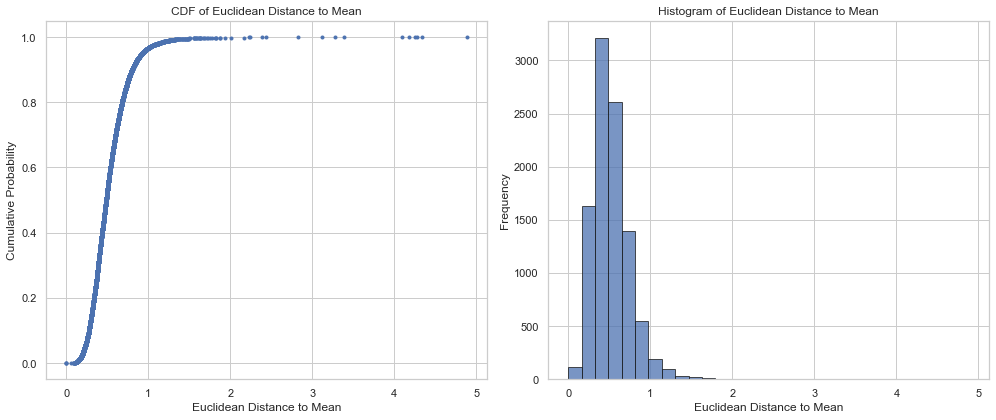

In [115]:
# I want to observe the distribution of the calculated euclidean distances to see if a Gaussian probability distribution is appropriate

sorted_data = np.sort(working_df['distance_to_mean'])

cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(sorted_data, cumulative_prob, marker='.', linestyle='none')
ax1.set_xlabel('Euclidean Distance to Mean')
ax1.set_ylabel('Cumulative Probability')
ax1.set_title('CDF of Euclidean Distance to Mean')
ax1.grid(True)

ax2.hist(working_df['distance_to_mean'], bins=30, edgecolor='k', alpha=0.75)
ax2.set_xlabel('Euclidean Distance to Mean')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Euclidean Distance to Mean')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [116]:
# Observed distribution is mainly normal with a slight right-skew. I will fit a Gaussian probability distribution

from scipy.stats import norm

mean, stdev = norm.fit(working_df['distance_to_mean'])
working_df['DEWPOINT_AFFECTED'] = norm.cdf(working_df['distance_to_mean'], loc=mu, scale=std)

print('Mean of Euclidean Distances:', mean)
print('Standard Deviation of Euclidean Distances:', stdev)

Mean of Euclidean Distances: 0.5250371482813334
Standard Deviation of Euclidean Distances: 0.25005619638298104


/opt/miniconda3/envs/cse217a/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [117]:
# Add the probability column to the original df

df['DEWPOINT_AFFECTED'] = working_df['DEWPOINT_AFFECTED']
df.head()

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,OUT_KEY,BALLS,STRIKES,IS_RUNNER_ON_1B,IS_RUNNER_ON_2B,IS_RUNNER_ON_3B,...,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z,DEWPOINT_AFFECTED
0,197,1,1,1,0,0,0,0,0,0,...,2402.459961,100.764999,-2.42717,6.08550,6.46,1.612990,-5.76003,0.197045,1.91282,0.302682
1,348,1,2,1,1,0,0,0,0,0,...,2273.459961,100.431000,-2.52253,5.97044,6.56,0.631016,-4.60990,-0.943079,2.87744,0.533690
2,1072,1,2,2,1,1,0,0,0,0,...,2314.459961,89.848999,-2.64242,5.89410,6.71,3.330480,-6.76551,0.012025,2.16833,0.934508
3,420,1,3,1,1,0,0,1,0,0,...,2340.459961,89.810997,-2.52429,5.90717,6.55,3.804230,-6.87764,0.584736,2.11319,0.649379
4,198,1,3,2,1,0,1,1,0,0,...,2445.459961,89.014397,-2.68096,6.10905,6.37,2.385210,-5.89879,-0.634335,3.45222,0.343807


In [118]:
output_df = df[['PID'] + ['DEWPOINT_AFFECTED']]
output_df

,PID,DEWPOINT_AFFECTED
0,197,0.302682
1,348,0.533690
2,1072,0.934508
3,420,0.649379
4,198,0.343807
...,...,...
9884,22663,0.094434
9885,28642,0.993317
9886,22664,0.436806
9887,22665,0.301844


In [119]:
output_df.to_csv('submission.csv', index=False)